<a href="https://colab.research.google.com/github/amrit100612/Internship-program_26/blob/main/Day_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Machine learning Performmance Metrrics:
---------------------------------------------

* True Positive(TP) -> Predicted Positive and Actual Positive. eg. patients has cancer , and the model correctly say they do.

* False Positive(FP)-> Predicted Positive but Actual Negative . eg. patient is healthy , but the model incorrectly say they have cancer.
---------------------------------------------

* False Negative(FN) -> Predicted negative but actually Positive.
 eg. person has cancer , but model say that they are healthy.

* True Negative(TN) -> Predicit negative and actually Negative.
. eg. Patient is healthy, and model say it correctly.
---------------------------------------------
* Precision vs Recall: Critical Trade-off
* Accuracy : Overall Correction
* F1 Score : Balanced Avg.
---------------------------------------------

* Accuraccy Trap :    
 Defination : Accuracy = (TP+TN)/ Total Pred.
====================================================


* Precision: (TP/{TP+FP}) -> TYPE 1 Error (Business) -> Spam filter, Recommendation
==================================================================

* Recall : (TP/{TP+FN}) -> TYPE 2 Error (Medical) -> Disease Screening, Fraud
===============================================================


* Specificity: Flip side of reecall

 * Specificity (True Negative Rate): (TN/ TN+FP)  
 -------------------------------------------------------


* Finding Balance : F1 Score -> F1 = 2* (Precision * Recall)/(Precision + Recall)
========================================================

-----------------------------------------------------------------

ROC Curve
AUC : Area under curve :

1.   AUC = 0.5 : Random Guess
2.   AUC = 1.0 : Perfect Pred.
3.   AUC = 0.0 : Perfectly Wrong  

-------------------------------------------------------------------------



* MAE & RMSE : Use RMSE when a single large error is unacceptable

* R2 shows the Variance of the data(Scatterness)

Condition             &         Recommendation Metric


*   DATA is imbalanceed             ==      F1 score

*   High cost of false negative   == REcall



*   HIgh cost of False positive  == Precision
*   Need probabilistic Ranking  == AUC/ Log Loss

*   Large Outlier are unacceptiable  == RMSE
*   Need simple interpretability == MAE

* KNN : Distance & Neighbor

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
df = pd.read_csv('/content/sample_data/Heart_Disease_Prediction.csv')

In [103]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [105]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [106]:
df.isnull().sum()

,0
Age,0
Sex,0
Chest pain type,0
BP,0
Cholesterol,0
FBS over 120,0
EKG results,0
Max HR,0
Exercise angina,0
ST depression,0


In [107]:
df.value_counts()

Age  Sex  Chest pain type  BP   Cholesterol  FBS over 120  EKG results  Max HR  Exercise angina  ST depression  Slope of ST  Number of vessels fluro  Thallium  Heart Disease
77   1    4                125  304          0             2            162     1                0.0            1            3                        3         Presence         1
29   1    2                130  204          0             2            202     0                0.0            1            0                        3         Absence          1
34   0    2                118  210          0             0            192     0                0.7            1            0                        3         Absence          1
     1    1                118  182          0             2            174     0                0.0            1            0                        3         Absence          1
35   0    4                138  183          0             0            182     0                1.4            1            0                        3         Absence          1
                                                                                                                                                                                ..
41   0    3                112  268          0             2            172     1                0.0            1            0                        3         Absence          1
          2                130  204          0             2            172     0                1.4            1            0                        3         Absence          1
                           126  306          0             0            163     0                0.0            1            0                        3         Absence          1
                           105  198          0             0            168     0                0.0            1            1                        3         Absence          1
40   1    4                152  223          0             0            181     0                0.0            1            0                        7         Presence         1
Name: count, Length: 270, dtype: int64

In [108]:
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
print("Numerical columns identified :\n", numerical_cols)

Numerical columns identified :
 ['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium']


/tmp/ipython-input-169648520.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df['BP'],palette='viridis')


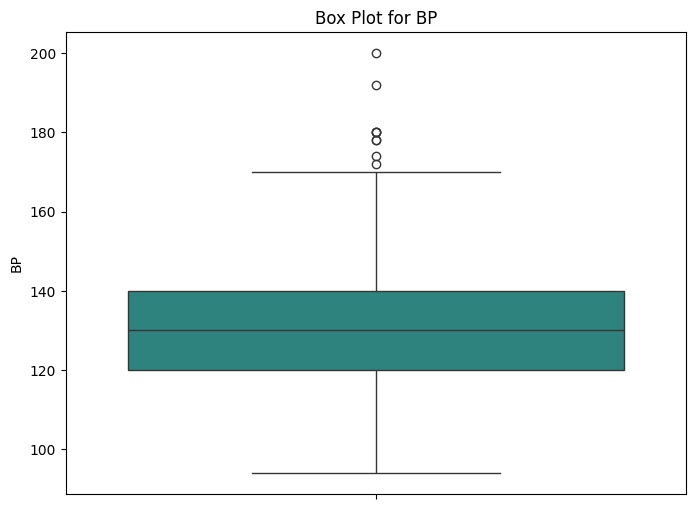

In [109]:
from sklearn import datasets

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['BP'],palette='viridis')
plt.title('Box Plot for BP')
plt.show()

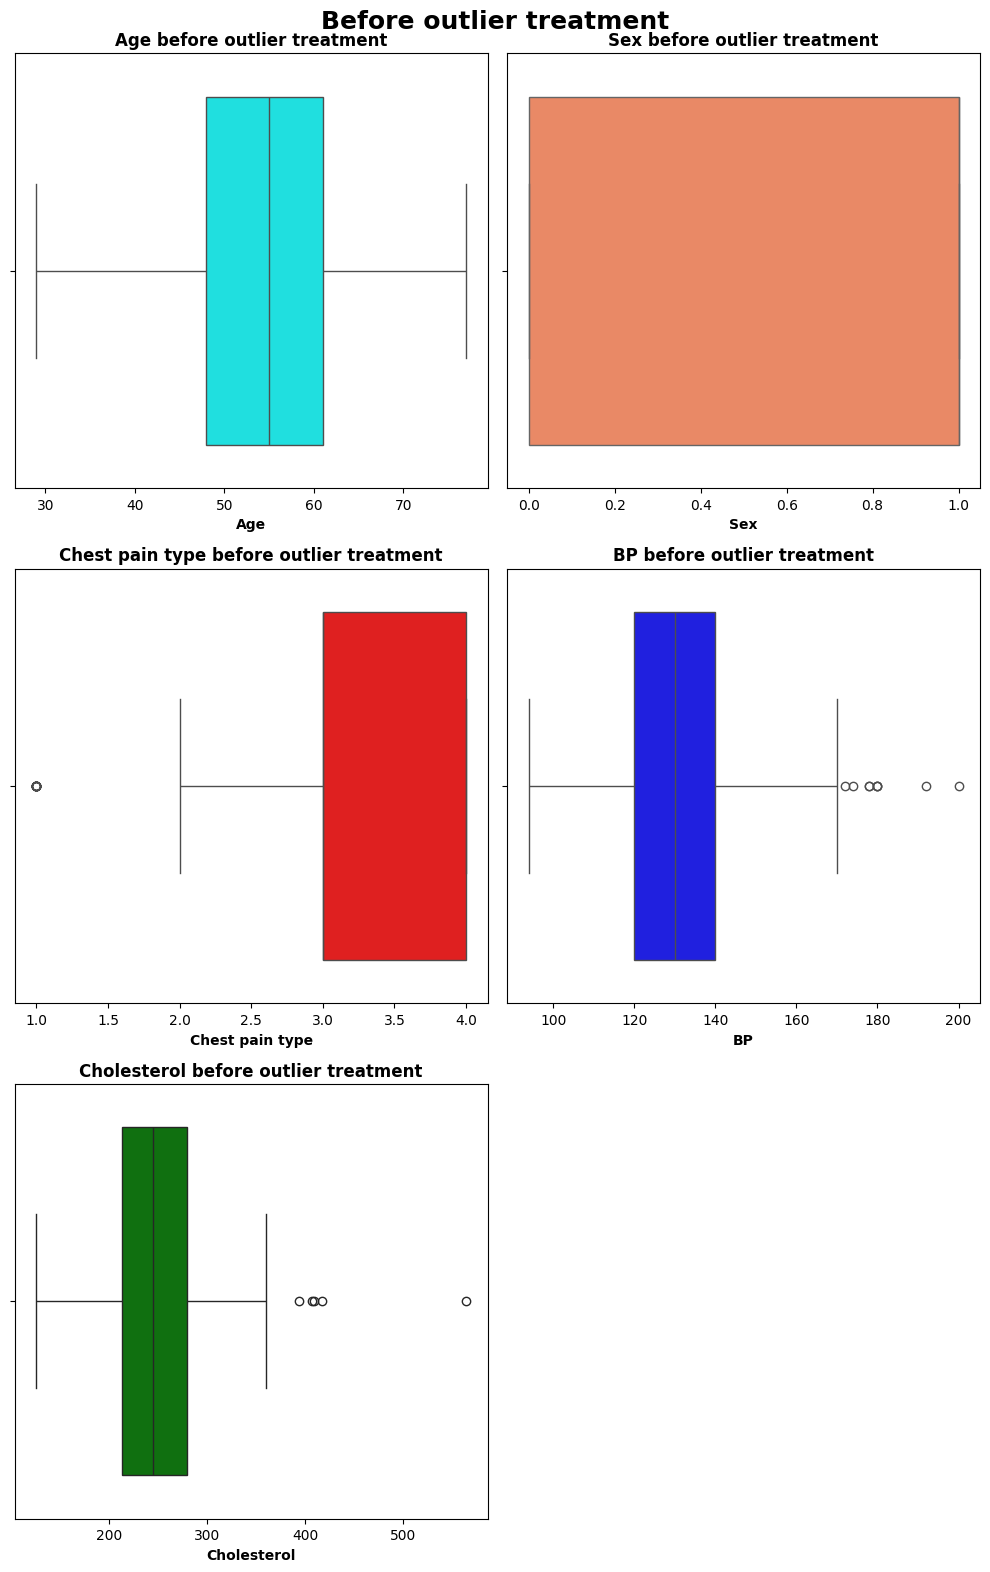

In [110]:
fig,axes = plt.subplots(3,2,figsize = (10,16))
colors = ['cyan' , 'coral' , 'red' , 'blue' , 'green']
axes = axes.flatten()
plt.delaxes(axes[-1])

columns_for_boxplotting = numerical_cols[:5]

for index in range(len(columns_for_boxplotting)):
  sns.boxplot(x= df[columns_for_boxplotting[index]] ,ax = axes[index] , color = colors[index])
  axes[index].set_xlabel(f'{columns_for_boxplotting[index]}' , fontweight = 'bold')
  axes[index].set_title(f'{columns_for_boxplotting[index]} before outlier treatment' , fontweight = 'bold')

fig.suptitle('Before outlier treatment' , fontweight = 'bold' , fontsize = 18)
plt.tight_layout()
plt.show()

In [111]:
for index in range(len(columns_for_boxplotting)):
  Q1 = df[columns_for_boxplotting[index]].quantile(0.25)
  Q3 = df[columns_for_boxplotting[index]].quantile(0.75)

  IQR = Q3 - Q1
  lower_limit = Q1 - 1.5 * IQR
  upper_limit = Q3 + 1.5 * IQR

  df[columns_for_boxplotting[index]] = df[columns_for_boxplotting[index]].clip(lower = lower_limit, upper = upper_limit)
print("Outlier removal accomplished!")

Outlier removal accomplished!


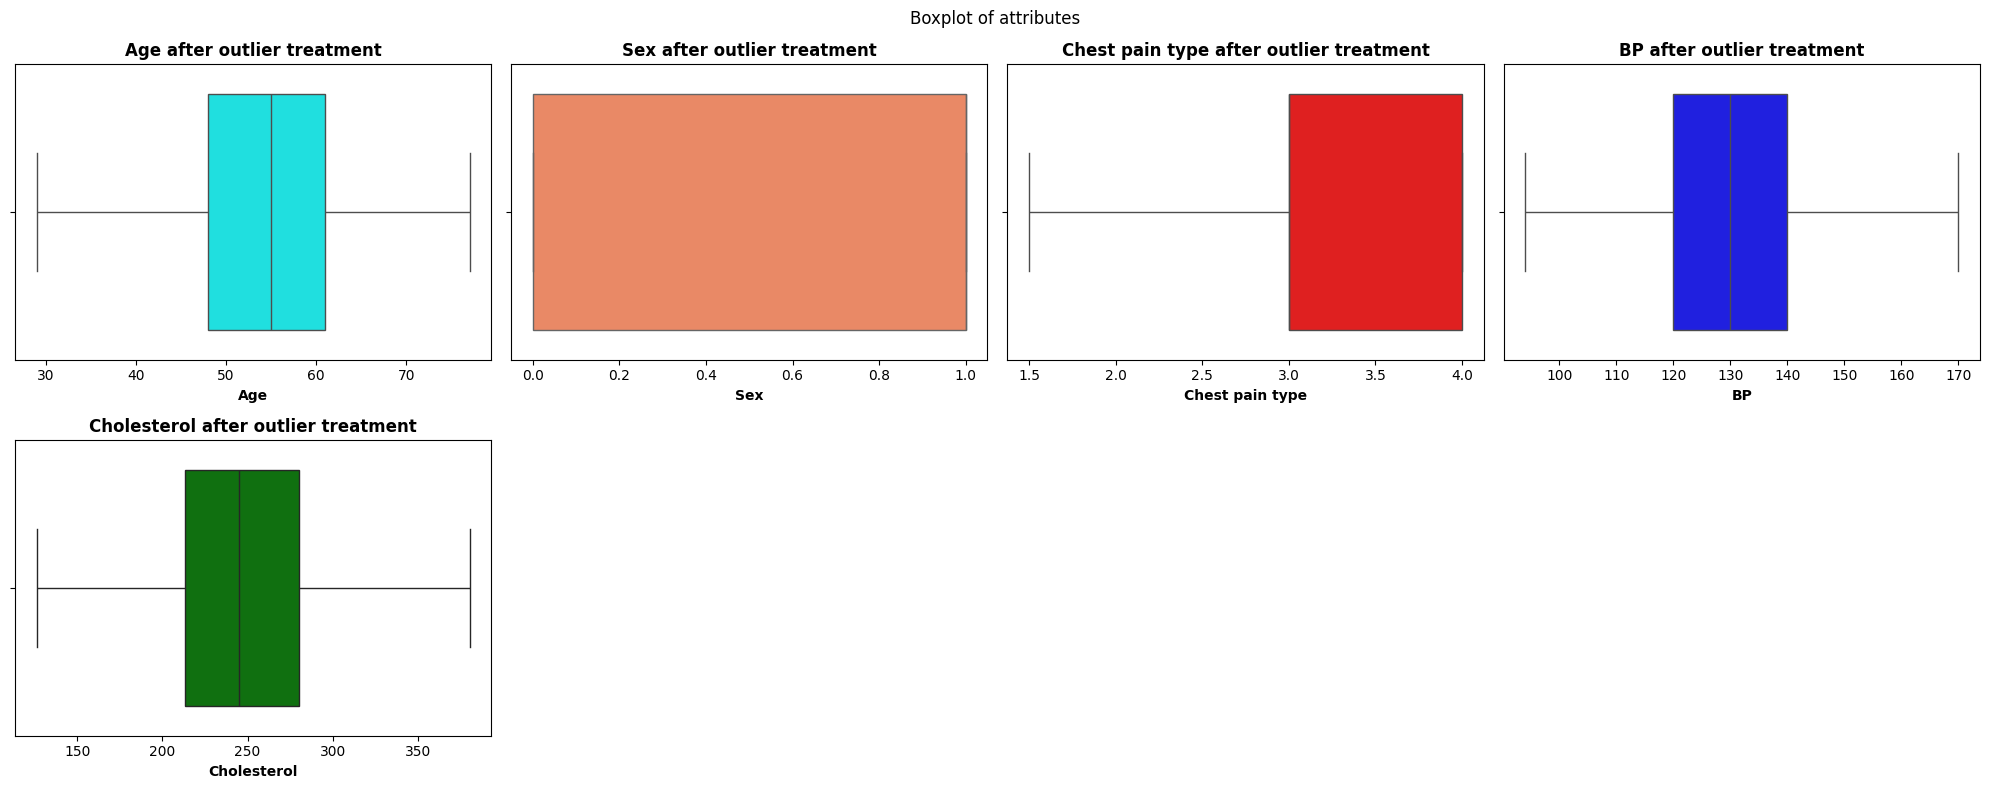

In [112]:
import math

n_cols = 4
n_rows = math.ceil(len(columns_for_boxplotting) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
colours = ['cyan', 'coral', 'red', 'blue', 'green']
axes = axes.flatten()

for index in range(len(columns_for_boxplotting)):
  sns.boxplot(x=df[columns_for_boxplotting[index]], ax=axes[index], color=colours[index % len(colours)])
  axes[index].set_xlabel(f'{columns_for_boxplotting[index]}', fontweight='bold')
  axes[index].set_title(f'{columns_for_boxplotting[index]} after outlier treatment', fontweight='bold')


for j in range(index + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Boxplot of attributes", fontweight=18)
plt.tight_layout()
plt.show()

In [113]:
df = pd.concat([df,pd.get_dummies(df['Thallium'],prefix='Thallium',drop_first=True,dtype=int)],axis=1)
df = df.drop(columns={'Thallium'})
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Heart Disease,Thallium_6,Thallium_7
0,70,1,4.0,130,322.0,0,2,109,0,2.4,2,3,Presence,0,0
1,67,0,3.0,115,380.5,0,2,160,0,1.6,2,0,Absence,0,1
2,57,1,2.0,124,261.0,0,0,141,0,0.3,1,0,Presence,0,1
3,64,1,4.0,128,263.0,0,0,105,1,0.2,2,1,Absence,0,1
4,74,0,2.0,120,269.0,0,2,121,1,0.2,1,1,Absence,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3.0,170,199.0,1,0,162,0,0.5,1,0,Absence,0,1
266,44,1,2.0,120,263.0,0,0,173,0,0.0,1,0,Absence,0,1
267,56,0,2.0,140,294.0,0,2,153,0,1.3,2,0,Absence,0,0
268,57,1,4.0,140,192.0,0,0,148,0,0.4,2,0,Absence,1,0


In [114]:
df=pd.concat([df,pd.get_dummies(df['EKG results'], prefix= 'EKG results',drop_first=True,dtype=int)],axis=1)
df= df.drop(columns={'EKG results'})
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Heart Disease,Thallium_6,Thallium_7,EKG results_1,EKG results_2
0,70,1,4.0,130,322.0,0,109,0,2.4,2,3,Presence,0,0,0,1
1,67,0,3.0,115,380.5,0,160,0,1.6,2,0,Absence,0,1,0,1
2,57,1,2.0,124,261.0,0,141,0,0.3,1,0,Presence,0,1,0,0
3,64,1,4.0,128,263.0,0,105,1,0.2,2,1,Absence,0,1,0,0
4,74,0,2.0,120,269.0,0,121,1,0.2,1,1,Absence,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3.0,170,199.0,1,162,0,0.5,1,0,Absence,0,1,0,0
266,44,1,2.0,120,263.0,0,173,0,0.0,1,0,Absence,0,1,0,0
267,56,0,2.0,140,294.0,0,153,0,1.3,2,0,Absence,0,0,0,1
268,57,1,4.0,140,192.0,0,148,0,0.4,2,0,Absence,1,0,0,0


In [115]:
df=pd.concat([df,pd.get_dummies(df['Slope of ST'], prefix= 'Slope of ST',drop_first=True,dtype=int)],axis=1)
df= df.drop(columns={'Slope of ST'})
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,Max HR,Exercise angina,ST depression,Number of vessels fluro,Heart Disease,Thallium_6,Thallium_7,EKG results_1,EKG results_2,Slope of ST_2,Slope of ST_3
0,70,1,4.0,130,322.0,0,109,0,2.4,3,Presence,0,0,0,1,1,0
1,67,0,3.0,115,380.5,0,160,0,1.6,0,Absence,0,1,0,1,1,0
2,57,1,2.0,124,261.0,0,141,0,0.3,0,Presence,0,1,0,0,0,0
3,64,1,4.0,128,263.0,0,105,1,0.2,1,Absence,0,1,0,0,1,0
4,74,0,2.0,120,269.0,0,121,1,0.2,1,Absence,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3.0,170,199.0,1,162,0,0.5,0,Absence,0,1,0,0,0,0
266,44,1,2.0,120,263.0,0,173,0,0.0,0,Absence,0,1,0,0,0,0
267,56,0,2.0,140,294.0,0,153,0,1.3,0,Absence,0,0,0,1,1,0
268,57,1,4.0,140,192.0,0,148,0,0.4,0,Absence,1,0,0,0,1,0


In [116]:
columns_for_scaling =['Age','BP','Cholesterol','Max HR','ST depression']

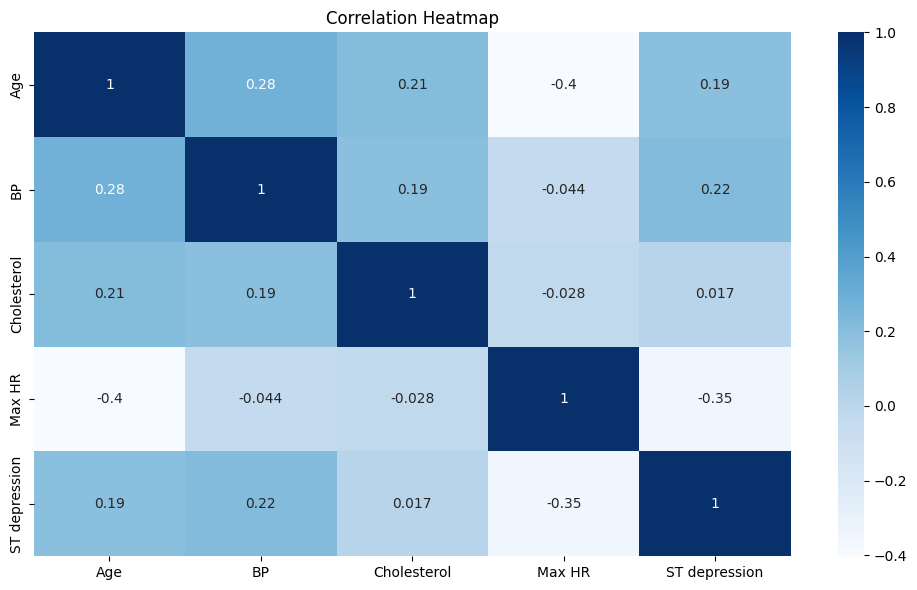

In [117]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[columns_for_scaling].corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [118]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[columns_for_scaling]=scaler.fit_transform(df[columns_for_scaling])
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,Max HR,Exercise angina,ST depression,Number of vessels fluro,Heart Disease,Thallium_6,Thallium_7,EKG results_1,EKG results_2,Slope of ST_2,Slope of ST_3
0,1.712094,1,4.0,-0.057210,1.549364,0,-1.759208,0,1.181012,3,Presence,0,0,0,1,1,0
1,1.382140,0,3.0,-0.951808,2.784055,0,0.446409,0,0.481153,0,Absence,0,1,0,1,1,0
2,0.282294,1,2.0,-0.415049,0.261908,0,-0.375291,0,-0.656118,0,Presence,0,1,0,0,0,0
3,1.052186,1,4.0,-0.176490,0.304119,0,-1.932198,1,-0.743600,1,Absence,0,1,0,0,1,0
4,2.152032,0,2.0,-0.653609,0.430754,0,-1.240239,1,-0.743600,1,Absence,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,-0.267629,1,3.0,2.328384,-1.046654,1,0.532904,0,-0.481153,0,Absence,0,1,0,0,0,0
266,-1.147506,1,2.0,-0.653609,0.304119,0,1.008625,0,-0.918565,0,Absence,0,1,0,0,0,0
267,0.172309,0,2.0,0.539188,0.958400,0,0.143677,0,0.218706,0,Absence,0,0,0,1,1,0
268,0.282294,1,4.0,0.539188,-1.194395,0,-0.072560,0,-0.568636,0,Absence,1,0,0,0,1,0


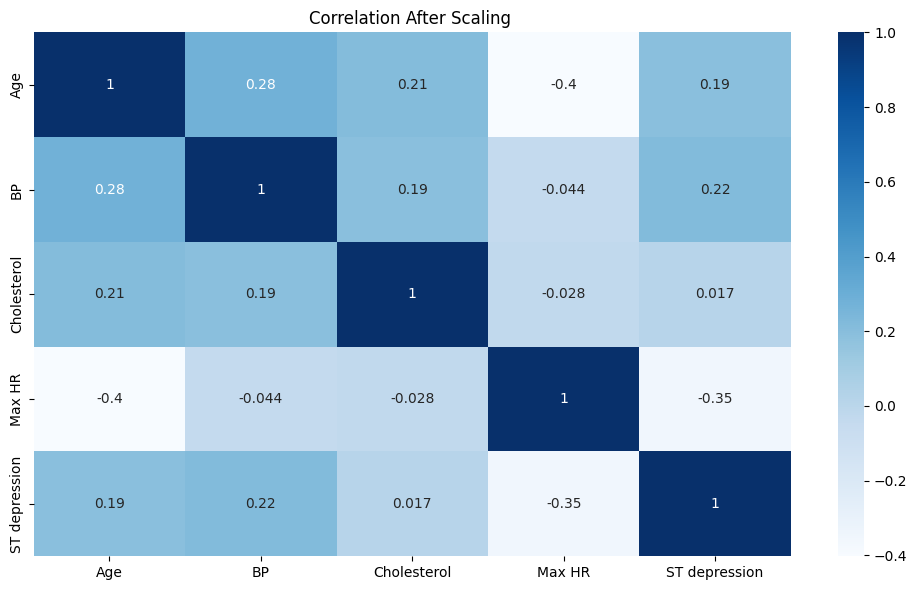

In [119]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[columns_for_scaling].corr(), annot=True, cmap='Blues')
plt.title('Correlation After Scaling ')
plt.tight_layout()
plt.show()

In [120]:
#Splitting the dataset into test and train set
from sklearn.model_selection import train_test_split

y = df['Heart Disease']

X_train, X_test = train_test_split(df, test_size=0.2, random_state=42,stratify=y)

y_train= X_train['Heart Disease']
X_train = X_train.drop(columns=['Heart Disease'])
y_test = X_test['Heart Disease']
X_test = X_test.drop(columns=['Heart Disease'])

In [121]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,Max HR,Exercise angina,ST depression,Number of vessels fluro,Heart Disease,Thallium_6,Thallium_7,EKG results_1,EKG results_2,Slope of ST_2,Slope of ST_3
0,1.712094,1,4.0,-0.057210,1.549364,0,-1.759208,0,1.181012,3,Presence,0,0,0,1,1,0
1,1.382140,0,3.0,-0.951808,2.784055,0,0.446409,0,0.481153,0,Absence,0,1,0,1,1,0
2,0.282294,1,2.0,-0.415049,0.261908,0,-0.375291,0,-0.656118,0,Presence,0,1,0,0,0,0
3,1.052186,1,4.0,-0.176490,0.304119,0,-1.932198,1,-0.743600,1,Absence,0,1,0,0,1,0
4,2.152032,0,2.0,-0.653609,0.430754,0,-1.240239,1,-0.743600,1,Absence,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,-0.267629,1,3.0,2.328384,-1.046654,1,0.532904,0,-0.481153,0,Absence,0,1,0,0,0,0
266,-1.147506,1,2.0,-0.653609,0.304119,0,1.008625,0,-0.918565,0,Absence,0,1,0,0,0,0
267,0.172309,0,2.0,0.539188,0.958400,0,0.143677,0,0.218706,0,Absence,0,0,0,1,1,0
268,0.282294,1,4.0,0.539188,-1.194395,0,-0.072560,0,-0.568636,0,Absence,1,0,0,0,1,0


In [122]:
y_test.value_counts()

,count
Heart Disease,
Absence,30
Presence,24


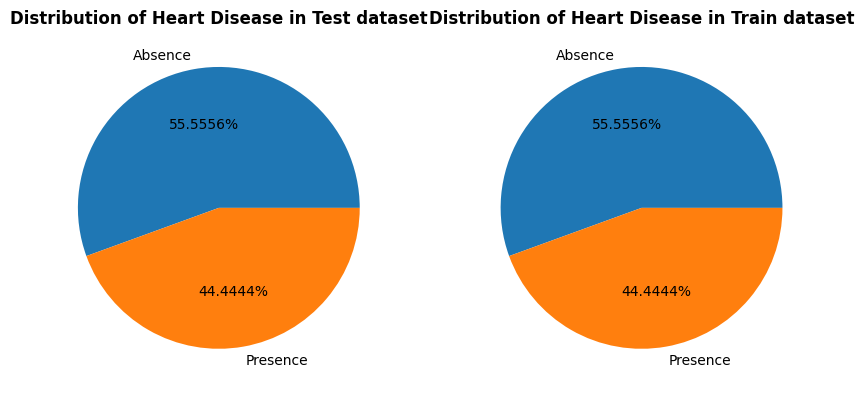

In [128]:
fig, axes = plt.subplots(1, 2, figsize=(10,10))

axes[0].pie(y_train.value_counts(),labels = ['Absence','Presence'],autopct='%1.4f%%')
axes[0].set_title("Distribution of Heart Disease in Test dataset",fontweight = 'bold')

axes[1].pie(y_test.value_counts(),labels = ['Absence','Presence'],autopct='%1.4f%%')
axes[1].set_title("Distribution of Heart Disease in Train dataset",fontweight = 'bold')
plt.show()

In [133]:
from sklearn.linear_model import LogisticRegression



In [135]:
model=LogisticRegression(C=0.85,max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(C=0.85, max_iter=1000)

In [137]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report



In [139]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

     Absence       0.90      0.87      0.88        30
    Presence       0.84      0.88      0.86        24

    accuracy                           0.87        54
   macro avg       0.87      0.87      0.87        54
weighted avg       0.87      0.87      0.87        54



* Interpretation :- According to the classification report we get the value of precision absence is 90% and present is 84%. (When the model predicts Absence, it is correct 90% of the time.)
==========================================================

* And recall absence is 87% and present is 88%.
(The model correctly identifies 83% of all actual Absence cases.)
=========================================================


* And the f1-score of absence is 88% and present is 86%.
(Balanced performance between precision and recall for Absence).
=======